En esta clase, la idea es crear una clase que abstraiga los comandos enviados tanto al osciloscopio como al generador de funciones.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import visa
import pyvisa

rm = visa.ResourceManager()
    
class Generador(pyvisa.resources.usb.USBInstrument):
    def __init__(self,ID):
        self=rm.open_resource(ID)
        self.ID = ID
         
    def setFrequency(self,freq):
        self.write("SOURce1:FREQuency:FIXed "+str(freq))
        
    def setAmplitude(self,amp):
        self.obj_visa.write("SOURce1:VOLTage:LEVel:IMMediate:AMPLitude "+str(amp))
        
    def setWaveform(self):
        self.obj_visa.write("SOURce1:AM:INTernal:FUNCtion SIN")
        

In [32]:
import numpy as np
import visa
import matplotlib.pyplot as plt
    
class Generador():
    def __init__(self,ID):
        self.obj_visa=rm.open_resource(ID)
        self.ID = ID
         
    def setFrequency(self,freq):
        self.obj_visa.write("SOURce1:FREQuency:FIXed "+str(freq))
        
    def setAmplitude(self,amp):
        self.obj_visa.write("SOURce1:VOLTage:LEVel:IMMediate:AMPLitude "+str(amp))
        
    def setWaveform(self,waveform ='Senoidal'):
        switcher = {'Senoidal':"SIN",'Cuadrada':"SQU",'Pulso':"PULS"}
        self.obj_visa.write("SOURce1:FUNCtion "+switcher.get(waveform,'Senoidal'))

    def sweepe(init_freq,end_freq,cant_med,osciloscopio)
        

        
class Osciloscopio():

    def __init__(self,ID):
        self.obj_visa=rm.open_resource(ID)
        self.ID = ID
        self.parameters = None
        
    def set_base_time(self,scale):
        self.obj_visa.write("HORizontal:DELay:SCALe "+str(scale))
       # self.obj_visa.write('HORizontal:DELay:SCALe {}'.format(scale))
            
    def capturaPantalla(self):
        if self.parameters is None:
            YOFF_in_dl = float(self.obj_visa.query("WFMP:YOFF?"))
            YZERO_in_YUNits = float(self.obj_visa.query("WFMP:YZERO?"))
            YMUlt = float(self.obj_visa.query("WFMP:YMULT?"))
            self.parameters = (YOFF_in_dl,YZERO_in_YUNits,YMUlt)
        (YOFF_in_dl , YZERO_in_YUNits , YMUlt) = self.parameters
        curve_in_dl = np.array(self.obj_visa.query_binary_values('CURV?', datatype='b', is_big_endian=True))
        valores = ((curve_in_dl - YOFF_in_dl)*YMUlt)+YZERO_in_YUNits
        intervalo = float(osci.obj_visa.query('WFMPre:XINcr?'))
        tiempos = np.arange(len(valores))*intervalo
        return tiempos, valores
    
def sweepe(generador, osciloscopio, init_freq = 10, end_freq = 10000, cant_med = 100):
    
    #Consulta OSciloscopio
    osci.obj_visa.write('MEASUrement:IMMed:TYPE PK2pk')
    valor = osci.obj_visa.query('MEASUREMENT:IMMed:VALue?')

In [36]:
rm = visa.ResourceManager()
ID=rm.list_resources()

In [37]:
genf = Generador(ID[0])
osci = Osciloscopio(ID[1])

In [38]:
genf.setFrequency(30)
genf.setAmplitude(0.6)
genf.setWaveform()

(0.0, 0.2499)

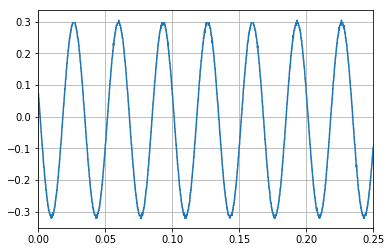

In [49]:
osci.set_base_time(2.0E-6)
tiempos, valores = osci.capturaPantalla()
plt.plot(tiempos,valores)
plt.grid(True)
plt.xlim(tiempos[0],tiempos[-1])

In [60]:
osci.obj_visa.write('HORizontal:DELay:SCALe 4.0E-9')

(31, <StatusCode.success: 0>)

In [61]:
osci.obj_visa.query('HORizontal:DELay:SCALe?')

'5.0E-9\n'

In [22]:
len(osci.capturaPantalla())*float(osci.obj_visa.query('WFMPre:XINcr?'))

0.1

In [87]:
osci.obj_visa.write('MEASUrement:IMMed:TYPE PK2pk')
osci.obj_visa.query('MEASUREMENT:IMMed:VALue?')

'6.240000725E-1\n'